#Practice Lab Neural Network 1
Student Information:
Name: Rushikesh Sawant

Roll Number: 56

Batch: A3

Date of Submission: 30-02-2026

#Neural Network Implementation from Scratch
###1. Objective
Implement a simple feedforward neural network from scratch in Python without using any deep learning libraries (e.g., TensorFlow, PyTorch). The implementation includes:

Forward pass

Backpropagation

Training using gradient descent

###2. Problem Definition
Dataset
Dataset Name: [MNIST / Iris / Custom Dataset]

Description: [Briefly describe the dataset, e.g., "MNIST dataset contains 60,000 training and 10,000 test images of handwritten digits (0-9)."]

Task: [Classification / Regression]

Example:
For MNIST: Classify handwritten digits (0-9).

For Iris: Classify iris flowers into three species.

###3. Methodology
Neural Network Architecture
Input Layer: 4

Hidden Layer(s):5

Output Layer: 1

Activation Functions:

Hidden Layer: [ReLU / Sigmoid / Tanh]

Output Layer: [Softmax (Classification) / Linear (Regression)]

Forward Pass
Weighted Sum: Compute
z
=
W
⋅
X
+
b
z=W⋅X+b

Activation: Apply activation function
a
=
σ
(
z
)
a=σ(z)

Propagate: Pass output to the next layer

Backpropagation
Compute Loss: Calculate error using [Cross-Entropy / MSE]

Gradient Calculation:

Derivative of loss w.r.t weights

Derivative of activation functions

Update Weights: Adjust weights using gradient descent

Loss Function
Classification: Cross-Entropy Loss

Regression: Mean Squared Error (MSE)

Optimization
Algorithm: Gradient Descent / Stochastic Gradient Descent (SGD)

Learning Rate: [Specify value, e.g., 0.01]



###4. Implementation
Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Load and Preprocess Dataset

In [2]:
# Example: Iris Dataset
data = load_iris()
X = data.data
y = data.target

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Neural Network Class

In [3]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]

        # Compute gradients
        dZ2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.a1 * (1 - self.a1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)

            if epoch % 100 == 0:
                loss = np.mean((output - y) ** 2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

Train the Model

In [5]:
!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Example: Iris Dataset
data = load_iris()
X = data.data
y = data.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)  # Create an instance of OneHotEncoder
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape y and fit_transform

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]

        # Compute gradients
        dZ2 = self.a2 - y  # Now y is one-hot encoded
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.a1 * (1 - self.a1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)

            if epoch % 100 == 0:
                loss = np.mean((output - y) ** 2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Example: Binary Classification (Modify for multi-class)
nn = NeuralNetwork(input_size=4, hidden_size=5, output_size=3)  # Adjust output_size to 3
nn.train(X_train, y_train, epochs=1000, learning_rate=0.01)

Epoch 0, Loss: 0.2503
Epoch 100, Loss: 0.2306
Epoch 200, Loss: 0.2241
Epoch 300, Loss: 0.2224
Epoch 400, Loss: 0.2219
Epoch 500, Loss: 0.2217
Epoch 600, Loss: 0.2215
Epoch 700, Loss: 0.2211
Epoch 800, Loss: 0.2206
Epoch 900, Loss: 0.2199


Evaluate Model

In [6]:
predictions = nn.forward(X_test)
accuracy = np.mean((predictions > 0.5) == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 66.67%


###5. Results & Visualization
Training Loss Curve

Epoch 0, Loss: 0.2502
Epoch 100, Loss: 0.2304
Epoch 200, Loss: 0.2239
Epoch 300, Loss: 0.2224
Epoch 400, Loss: 0.2220
Epoch 500, Loss: 0.2219
Epoch 600, Loss: 0.2217
Epoch 700, Loss: 0.2216
Epoch 800, Loss: 0.2214
Epoch 900, Loss: 0.2212


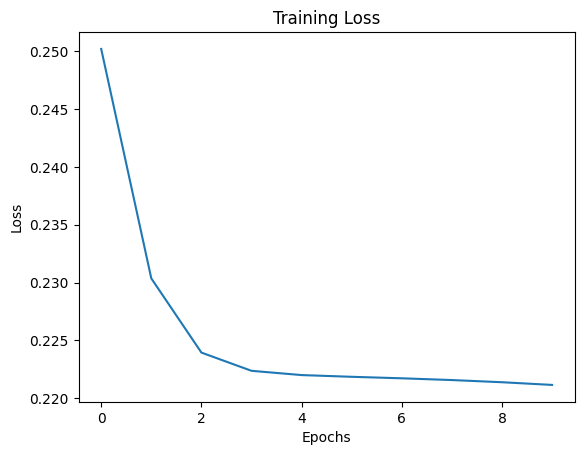

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Example: Iris Dataset
data = load_iris()
X = data.data
y = data.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)  # Create an instance of OneHotEncoder
y = encoder.fit_transform(y.reshape(-1, 1))  # Reshape y and fit_transform

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]

        # Compute gradients
        dZ2 = self.a2 - y  # Now y is one-hot encoded
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.a1 * (1 - self.a1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate):
        loss_history = []  # Initialize loss_history to store loss values
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)

            if epoch % 100 == 0:
                loss = np.mean((output - y) ** 2)
                loss_history.append(loss)  # Append loss to loss_history
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return loss_history # Return the loss history

# Example: Binary Classification (Modify for multi-class)
nn = NeuralNetwork(input_size=4, hidden_size=5, output_size=3)  # Adjust output_size to 3
loss_history = nn.train(X_train, y_train, epochs=1000, learning_rate=0.01) # Get the loss history

# Now you can plot the loss history
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

6. Declaration
I, Rushikesh Sawant, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

🔗 GitHub Repository Link:https://github.com/Rushii2002-lab/Assign01.git

✍️ Signature: rushikesh Sawant